# 1. 데이터 로드

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


rankings = pd.read_csv('data/rankings.csv')
matches = pd.read_csv('data/results.csv')
world_cup = pd.read_excel('data/월드컵 2022 데이터베이스.xlsx')

In [29]:
rankings.head()

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1947-08-10,0.0,0.0
1,2,Italy,ITA,0.0,1947-08-10,0.0,0.0
2,3,Switzerland,SUI,0.0,1947-08-10,0.0,0.0
3,4,Sweden,SWE,0.0,1947-08-10,0.0,0.0
4,5,Argentina,ARG,0.0,1947-08-10,0.0,0.0


In [30]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173379 entries, 0 to 173378
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rank                     173379 non-null  int64  
 1   country_full             173379 non-null  object 
 2   country_abrv             173379 non-null  object 
 3   cur_year_avg_weighted    173379 non-null  float64
 4   rank_date                173379 non-null  object 
 5   two_year_ago_weighted    173379 non-null  float64
 6   three_year_ago_weighted  173379 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 9.3+ MB


- rankings 데이터는 결측치가 없음
- rank_date 컬럼이 object 형이기 때문에 날짜 타입으로 바꿔줘야함

In [31]:
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

- 최근 3년간 피파랭킹 산정에 사용된 가중치들의 합계 컬럼 생성

In [32]:
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']

In [33]:
rankings['country_full'].unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "CÃ´te d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahrai

- 중간에 RCS라는 나라가 껴있는데 이게 무슨 나라인지 모르겠음... 
- 우선은 냅두고 진행함

In [34]:
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [35]:
matches['date'] = pd.to_datetime(matches['date'])

In [36]:
world_cup.head()

,Team,Group,Previous \n appearances,Previous \n titles,Previous\n finals,Previous\n semifinals,Current \n FIFA rank,First match \n against,Match index,history with \n first opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals
0,Qatar,A,0,0,0,0,50,Ecuador,1,1.0,1.0,Senegal,17,NaN,NaN,Netherlands,33,NaN,NaN
1,Ecuador,A,3,0,0,0,44,Qatar,1,-1.0,-1.0,Netherlands,18,-1.0,-1.0,Senegal,34,-1.0,-1.0
2,Senegal,A,2,0,0,0,18,Netherlands,2,NaN,NaN,Qatar,17,NaN,NaN,Ecuador,34,1.0,1.0
3,Netherlands,A,10,0,3,5,8,Senegal,2,NaN,NaN,Ecuador,18,1.0,1.0,Qatar,33,NaN,NaN
4,England,B,15,1,1,3,5,Iran,3,NaN,NaN,USA,19,2.0,5.0,Wales,35,10.0,21.0


In [37]:
world_cup = world_cup.set_index('Team')

In [38]:
world_cup.head()

,Group,Previous \n appearances,Previous \n titles,Previous\n finals,Previous\n semifinals,Current \n FIFA rank,First match \n against,Match index,history with \n first opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals
Team,,,,,,,,,,,,,,,,,,
Qatar,A,0,0,0,0,50,Ecuador,1,1.0,1.0,Senegal,17,NaN,NaN,Netherlands,33,NaN,NaN
Ecuador,A,3,0,0,0,44,Qatar,1,-1.0,-1.0,Netherlands,18,-1.0,-1.0,Senegal,34,-1.0,-1.0
Senegal,A,2,0,0,0,18,Netherlands,2,NaN,NaN,Qatar,17,NaN,NaN,Ecuador,34,1.0,1.0
Netherlands,A,10,0,3,5,8,Senegal,2,NaN,NaN,Ecuador,18,1.0,1.0,Qatar,33,NaN,NaN
England,B,15,1,1,3,5,Iran,3,NaN,NaN,USA,19,2.0,5.0,Wales,35,10.0,21.0


In [39]:
world_cup.columns

Index(['Group', 'Previous \n appearances', 'Previous \n titles',
       'Previous\n  finals', 'Previous\n  semifinals', 'Current \n FIFA rank',
       'First match \n against', 'Match index',
       'history with \n first opponent\n  W-L',
       'history with\n  first opponent\n  goals', 'Second match\n  against',
       'Match index.1', 'history with\n  second opponent\n  W-L',
       'history with\n  second opponent\n  goals', 'Third match\n  against',
       'Match index.2', 'history with\n  third opponent\n  W-L',
       'history with\n  third opponent\n  goals'],
      dtype='object')

# 2. 피쳐 엔지니어링

- matches와 rankings 병합
- left_on / right_on : 열기준 병합 시 기준으로 할 열의 양측 이름이 다르다면, 각각 어떤 열을 기준으로 할지 정해줍니다.
열의 이름을 입력하면 됩니다
- suffixes : 병합할 객체들간 이름이 중복되는 열이 있다면, 해당 열에 붙일 접미사를 정합니다.

In [40]:
# join the ranks
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))

## 변수 세팅
- rank difference :  home과 away 간의 랭킹 차이로 랭킹 차이가 클수록 ranking 높은 쪽이 승리 확률이 높음                                  
- point difference : home과 away 간의 피파 점수 차이로 점수 차이가 클수록 point가 높은 쪽이 승리 확률이 높음                              
- is_stake : 친선경기는 제외
- is_won : score difference (득실차)가 0보다 큰 팀이 이기는 팀
**(추가)**
- diff_total_score : home_total_score - away_total_score로 home, away 각각 공격지표, 미드지표, 수비지표 데이터를 구해 total이 높은 쪽이 팀 밸런스가 좋은 국가로 높은 국가가 승리확률이 높아짐

In [41]:
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['weighted_points_home'] - matches['weighted_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

# 3. 모델링


## Logistic Regression
- PolynomialFeatures (다항 회귀) 사용
    - 독립변수와 종속변수 간의 관계가 선형의 관계가 아닐 때(= 비선형 관계일 때)사용
    - 독립변수에 제곱을(degree=2)하여 여러개의 변수를 만들어 모델을 구성하는 방법
   

In [43]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

X, y = matches.loc[:,['average_rank','rank_difference', 'point_difference', 'is_stake']], matches['is_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(C=0.1,
                        max_iter = 100,
                        random_state = 42)
model_lr = lr.fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fscore = f1_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('Fscore: {:.2f}%'.format(fscore*100))

print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 63.73%
Precision: 66.15%
Recall: 57.72%
Fscore: 61.65%


## DecisionTree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(max_depth=3,
                            min_samples_leaf = 20,
                            random_state = 42)
model_dt = dt.fit(X_train, y_train)
y_test_pred = model_dt.predict(X_test)
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 63.05%
Precision: 63.16%
Recall: 64.43%
Fscore: 63.79%


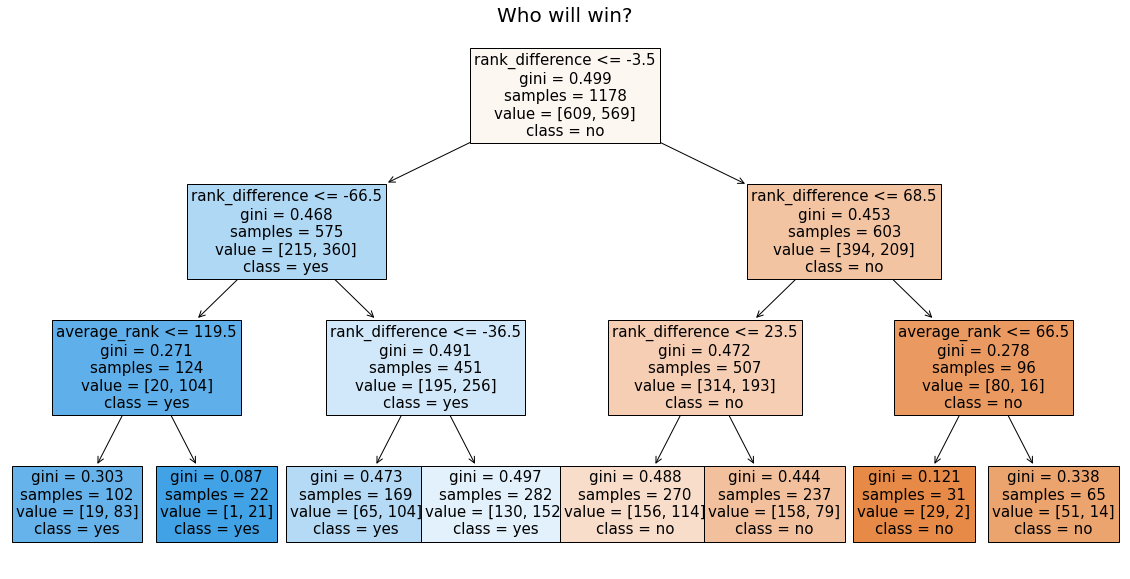

In [46]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(20, 10))
plot_tree(model_dt, feature_names=X.columns, class_names=['no', 'yes'], filled=True, fontsize=15)
plt.title('Who will win?', fontsize=20)
# plt.tight_layout()
plt.show()

## RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40,
                          max_depth = 3,
                          min_samples_leaf = 20,
                          random_state = 42)
model_rf = rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)
print('Evaluation on Test Set:')
evaluate(y_test, y_test_pred)

Evaluation on Test Set:
Accuracy: 63.39%
Precision: 65.19%
Recall: 59.06%
Fscore: 61.97%


- n_estimators를 처음에 500으로 했었는데 40 미만만 아니면 성능은 같았음
- max_depth는 1이하, 5이상으로 지정하면 성능 저하
- min_samples_leaf는 5이하로 지정하면 AUC 값 0.7이하로 떨어짐, 5~10으로 했을 때 0.7, 20으로 했을 때 0.71, 30 이상으로 하면 0.7

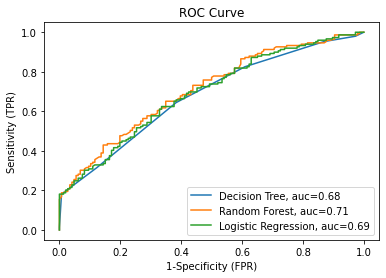

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

for model, name in zip([model_dt, model_rf, model_lr], 
                     ['Decision Tree', 'Random Forest', 'Logistic Regression']):
    y_test_pred_proba = model.predict_proba(X_test)[:, 1] # probability score of positive class
    fpr, tpr, _ = roc_curve(y_test,  y_test_pred_proba) # get fpr and tpr arrays
    auc = roc_auc_score(y_test, y_test_pred_proba) # get auc
    plt.plot(fpr, tpr, label="{}, auc={:.2f}".format(name, auc))

plt.legend(loc=4)
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()

Stakes distribution in the wrong predictions
False    0.654206
True     0.345794
Name: is_stake, dtype: float64
Stakes distribution overall
False    0.500339
True     0.499661
Name: is_stake, dtype: float64


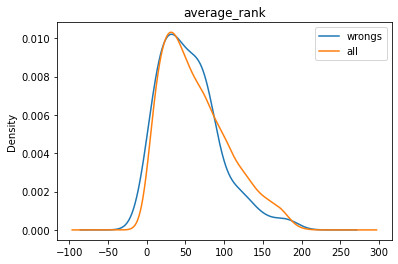

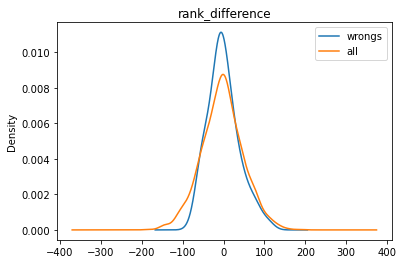

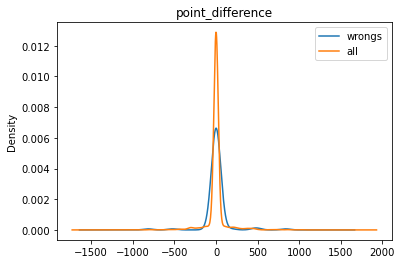

In [49]:
features = ['average_rank', 'rank_difference', 'point_difference']
wrongs = y_test != model.predict(X_test)

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])
    
print("Stakes distribution in the wrong predictions")
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print("Stakes distribution overall")
print(X['is_stake'].value_counts() / X.shape[0])

- 랭킹 차이가 적을수록 예측이 더 안 좋음

# 4. 월드컵 시뮬레이션

In [50]:
# let's define a small margin when we safer to predict draw then win
margin = 0.05

world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

In [51]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        home_win_prob = model.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group B:___
England vs. Iran: Draw
England vs. USA: Draw
England vs. Wales: Draw
Iran vs. USA: USA wins with 0.57
Iran vs. Wales: Wales wins with 0.60
USA vs. Wales: Wales wins with 0.57
___Starting group A:___
Qatar vs. Ecuador: Ecuador wins with 0.65
Qatar vs. Senegal: Senegal wins with 0.74
Qatar vs. Netherlands: Netherlands wins with 0.76
Ecuador vs. Senegal: Senegal wins with 0.63
Ecuador vs. Netherlands: Netherlands wins with 0.65
Senegal vs. Netherlands: Netherlands wins with 0.56
___Starting group H:___
Portugal vs. Ghana: Portugal wins with 0.58
Portugal vs. Uruguay: Draw
Portugal vs. Korea Republic: Portugal wins with 0.61
Ghana vs. Uruguay: Uruguay wins with 0.63
Ghana vs. Korea Republic: Draw
Uruguay vs. Korea Republic: Uruguay wins with 0.59
___Starting group E:___
Spain vs. Costa Rica: Draw
Spain vs. Germany: Germany wins with 0.56
Spain vs. Japan: Spain wins with 0.61
Costa Rica vs. Germany: Germany wins with 0.59
Costa Rica vs. Japan: Costa Rica wins with 0.

## Single-elimination rounds

In [52]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. USA: USA wins with probability 0.53
Poland vs. Denmark: Denmark wins with probability 0.52
Germany vs. Belgium: Belgium wins with probability 0.56
Switzerland vs. Portugal: Portugal wins with probability 0.55
Senegal vs. Wales: Wales wins with probability 0.57
Argentina vs. Tunisia: Argentina wins with probability 0.50
Spain vs. Croatia: Croatia wins with probability 0.53
Brazil vs. Uruguay: Uruguay wins with probability 0.51


___Starting of the quarterfinal___
USA vs. Denmark: Denmark wins with probability 0.57
Belgium vs. Portugal: Portugal wins with probability 0.55
Wales vs. Argentina: Argentina wins with probability 0.58
Croatia vs. Uruguay: Uruguay wins with probability 0.55


___Starting of the semifinal___
Denmark vs. Portugal: Portugal wins with probability 0.58
Argentina vs. Uruguay: Uruguay wins with probability 0.52


___Starting of the final___
Portugal vs. Uruguay: Uruguay wins with probability 0.52




## 변수의 영향(중요도 확인)

In [53]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_rf, scoring = "f1", random_state = 42).fit(X_test, y_test)
eli5.show_weights(perm, top = 80, feature_names = X_test.columns.tolist())

Weight,Feature
0.1426 ± 0.0839,rank_difference
0.0002 ± 0.0143,point_difference
-0.0012 ± 0.0099,average_rank
-0.0062 ± 0.0077,is_stake


In [54]:
import numpy as np

indices = np.argsort(model_rf.feature_importances_)[::-1]
for i in indices:
    print('{:<30}: {}'.format(X_train.columns[i], model_rf.feature_importances_[i]))

rank_difference               : 0.6868139976208505
point_difference              : 0.15644821257276495
average_rank                  : 0.1371602651337706
is_stake                      : 0.01957752467261383


- 가장 중요한 변수는 'rank_difference'인 것으로 확인
- average_rank는 permutation importance에서는 최솟값이 -인데 반해 feature_importances에서는 두번째로 영향이 큰 변수로 확인됨..!
- 그래도 모든 변수가 다 0이 넘으므로 딱히 제거해야할 변수는 없어 보임

# 05. 결과
- 0.58의 확률로 독일의 최종 우승이 예상됨
- 우리나라는 아쉽지만 16강에 진출하지 못할 것으로 예상됨